# MUSER Imaging and deconvolution demonstration

This script makes a fake data set and then deconvolves it. Finally the full and residual visibility are plotted.

In [54]:
%matplotlib inline

import os
import sys

sys.path.append(os.path.join('..', '..'))

results_dir = '/tmp/'

from matplotlib import pylab

pylab.rcParams['figure.figsize'] = (8.0, 8.0)
pylab.rcParams['image.cmap'] = 'rainbow'

import numpy

from astropy.coordinates import SkyCoord
from astropy import units as u

from matplotlib import pyplot as plt


from rascil.data_models import PolarisationFrame
from astropy.coordinates import EarthLocation, SkyCoord, ITRS
from rascil.processing_components import create_configuration_from_file
from rascil.processing_components.visibility.coalesce import convert_visibility_to_blockvisibility, \
    convert_blockvisibility_to_visibility
from rascil.processing_components.visibility.base import create_blockvisibility_from_ms, create_visibility_from_ms
from rascil.processing_components import create_visibility, show_image, export_image_to_fits, \
    deconvolve_cube, restore_cube, create_named_configuration, create_test_image, \
    create_image_from_visibility, advise_wide_field, invert_2d, predict_2d
from fund import create_configuration
from muser.data_models.parameters import muser_path, muser_data_path, muser_output_path

import logging
from muser.data_models.parameters import muser_path
import os

log = logging.getLogger()
log.setLevel(logging.DEBUG)
log.addHandler(logging.StreamHandler(sys.stdout))

mpl_logger = logging.getLogger("matplotlib") 
mpl_logger.setLevel(logging.WARNING) 




In [47]:
pylab.rcParams['figure.figsize'] = (12.0, 12.0)
pylab.rcParams['image.cmap'] = 'rainbow'

Construct LOW core configuration

In [51]:
location = EarthLocation(lon=115.2505 * u.deg, lat=42.211833333 * u.deg, height=1365.0 * u.m)

# conf_dir = muser_path('configurations')

# antfile = os.path.join(conf_dir, 'muser-1.csv')
# lowcore = create_configuration_from_file(antfile=antfile,
#              mount='altaz', names='MUSER_%d',
#              diameter=2.0, name='MUSER', location=location)

msfile = muser_output_path("CSRH_20151122-125000_100457483.ms")
vis = create_blockvisibility_from_ms(msfile)

        
#lowr3 = create_named_configuration('LOWBD2', rmax=750.0)

create_blockvisibility_from_ms: {'type': 'Measurement Set', 'subType': '', 'readme': 'This is a MeasurementSet Table holding measurements from a Telescope\n'}
create_blockvisibility_from_ms: {'type': 'Measurement Set', 'subType': '', 'readme': 'This is a MeasurementSet Table holding measurements from a Telescope\n'}
create_blockvisibility_from_ms: {'type': 'Measurement Set', 'subType': '', 'readme': 'This is a MeasurementSet Table holding measurements from a Telescope\n'}
create_blockvisibility_from_ms: {'type': 'Measurement Set', 'subType': '', 'readme': 'This is a MeasurementSet Table holding measurements from a Telescope\n'}
create_blockvisibility_from_ms: {'type': 'Measurement Set', 'subType': '', 'readme': 'This is a MeasurementSet Table holding measurements from a Telescope\n'}
create_blockvisibility_from_ms: {'type': 'Measurement Set', 'subType': '', 'readme': 'This is a MeasurementSet Table holding measurements from a Telescope\n'}
create_blockvisibility_from_ms: {'type': 'Meas

In [52]:
print(lowcore.xyz)

[[ 0.000000e+00  0.000000e+00  0.000000e+00]
 [-2.200000e-02  7.988000e+00  0.000000e+00]
 [-6.426000e+00  1.945600e+01  0.000000e+00]
 [-2.102500e+01  2.866100e+01  0.000000e+00]
 [-4.437100e+01  3.179900e+01  0.000000e+00]
 [-7.980600e+01 -5.350000e-01  1.000000e-01]
 [-9.224300e+01 -6.798100e+01  0.000000e+00]
 [-4.982300e+01 -1.569240e+02  0.000000e+00]
 [ 7.511100e+01 -2.262020e+02  0.000000e+00]
 [ 2.836050e+02 -2.032260e+02  0.000000e+00]
 [ 5.171110e+02  3.454000e+00  0.000000e+00]
 [ 6.248820e+02  4.599030e+02  0.000000e+00]
 [ 3.562290e+02  1.120404e+03  5.500000e+00]
 [-2.864600e+02  1.817530e+03  1.000000e+01]
 [-6.884000e+00 -4.112000e+00  0.000000e+00]
 [-1.355900e+01 -1.539400e+01  0.000000e+00]
 [-1.421400e+01 -3.249900e+01  0.000000e+00]
 [-5.365000e+00 -5.436400e+01  0.000000e+00]
 [ 4.033400e+01 -6.877600e+01  0.000000e+00]
 [ 1.050050e+02 -4.599400e+01  0.000000e+00]
 [ 1.607450e+02  3.521000e+01  0.000000e+00]
 [ 1.583530e+02  1.780050e+02  0.000000e+00]
 [ 3.43110

We create the visibility. This just makes the uvw, time, antenna1, antenna2, weight columns in a table

In [56]:
vt = convert_blockvisibility_to_visibility(vis[0])

advice = advise_wide_field(vt, guard_band_image=3.0, delA=0.1, facets=1, wprojection_planes=1,
                           oversampling_synthesised_beam=4.0)
cellsize = advice['cellsize']

convert_visibility: Original 1 rows, 0.008 GB, converted 49920 rows, 0.007 GB
convert_visibility: Original 1 rows, 0.008 GB, converted 49920 rows, 0.007 GB
convert_visibility: Original 1 rows, 0.008 GB, converted 49920 rows, 0.007 GB
convert_visibility: Original 1 rows, 0.008 GB, converted 49920 rows, 0.007 GB
convert_visibility: Original 1 rows, 0.008 GB, converted 49920 rows, 0.007 GB
convert_visibility: Original 1 rows, 0.008 GB, converted 49920 rows, 0.007 GB
convert_visibility: Original 1 rows, 0.008 GB, converted 49920 rows, 0.007 GB
convert_visibility: Original 1 rows, 0.008 GB, converted 49920 rows, 0.007 GB
convert_visibility: Original 1 rows, 0.008 GB, converted 49920 rows, 0.007 GB
convert_visibility: Original 1 rows, 0.008 GB, converted 49920 rows, 0.007 GB
convert_visibility: Original 1 rows, 0.008 GB, converted 49920 rows, 0.007 GB
advise_wide_field: (max_wavelength) Maximum wavelength 0.749 (meters)
advise_wide_field: (max_wavelength) Maximum wavelength 0.749 (meters)
ad

advise_wide_field: (cellsize) Cellsize 1.16e-05 (rad) 0.000664 (deg) 2.39 (asec)
advise_wide_field: (cellsize) Cellsize 1.16e-05 (rad) 0.000664 (deg) 2.39 (asec)
advise_wide_field: (cellsize) Cellsize 1.16e-05 (rad) 0.000664 (deg) 2.39 (asec)
advise_wide_field: (cellsize) Cellsize 1.16e-05 (rad) 0.000664 (deg) 2.39 (asec)
advice_wide_field: (npixels) Npixels per side = 43144
advice_wide_field: (npixels) Npixels per side = 43144
advice_wide_field: (npixels) Npixels per side = 43144
advice_wide_field: (npixels) Npixels per side = 43144
advice_wide_field: (npixels) Npixels per side = 43144
advice_wide_field: (npixels) Npixels per side = 43144
advice_wide_field: (npixels) Npixels per side = 43144
advice_wide_field: (npixels) Npixels per side = 43144
advice_wide_field: (npixels) Npixels per side = 43144
advice_wide_field: (npixels) Npixels per side = 43144
advice_wide_field: (npixels) Npixels per side = 43144
advice_wide_field: (npixels2) Npixels (power of 2) per side = 65536
advice_wide_fi

advice_wide_field: (freq_sampling_primary_beam) Frequency sampling for primary beam = 549325.9 (Hz)
advice_wide_field: (freq_sampling_primary_beam) Frequency sampling for primary beam = 549325.9 (Hz)
advice_wide_field: (freq_sampling_primary_beam) Frequency sampling for primary beam = 549325.9 (Hz)
advice_wide_field: (freq_sampling_primary_beam) Frequency sampling for primary beam = 549325.9 (Hz)
advice_wide_field: (freq_sampling_primary_beam) Frequency sampling for primary beam = 549325.9 (Hz)
advice_wide_field: (freq_sampling_primary_beam) Frequency sampling for primary beam = 549325.9 (Hz)
advice_wide_field: (freq_sampling_primary_beam) Frequency sampling for primary beam = 549325.9 (Hz)
advice_wide_field: (freq_sampling_primary_beam) Frequency sampling for primary beam = 549325.9 (Hz)
advice_wide_field: (freq_sampling_primary_beam) Frequency sampling for primary beam = 549325.9 (Hz)
advice_wide_field: (freq_sampling_primary_beam) Frequency sampling for primary beam = 549325.9 (Hz)


Plot the synthesized uv coverage.

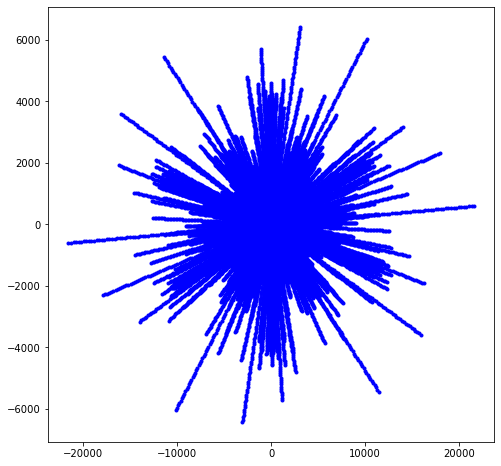

In [58]:
plt.clf()
plt.plot(vt.data['uvw'][:,0], vt.data['uvw'][:,1], '.', color='b')
plt.plot(-vt.data['uvw'][:,0], -vt.data['uvw'][:,1], '.', color='b')
# plt.xlim([-400.0, 400.0])
# plt.ylim([-400.0, 400.0])
plt.show()

Read the venerable test image, constructing an image

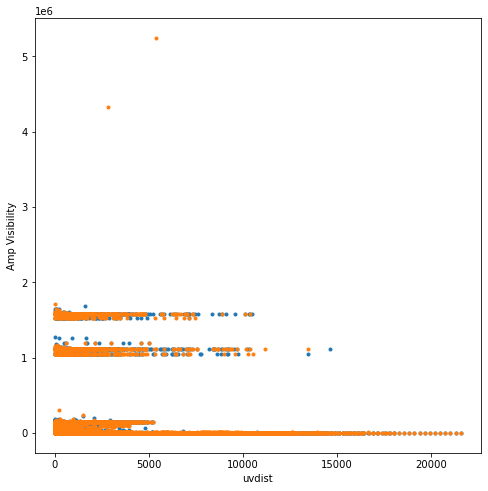

In [59]:
# To check that we got the prediction right, plot the amplitude of the visibility.
uvdist=numpy.sqrt(vt.data['uvw'][:,0]**2+vt.data['uvw'][:,1]**2)
plt.clf()
plt.plot(uvdist, numpy.abs(vt.data['vis']), '.')
plt.xlabel('uvdist')
plt.ylabel('Amp Visibility')
plt.show()

Make the dirty image and point spread function

create_image_from_visibility: Parsing parameters to get definition of WCS
create_image_from_visibility: Parsing parameters to get definition of WCS
create_image_from_visibility: Parsing parameters to get definition of WCS
create_image_from_visibility: Parsing parameters to get definition of WCS
create_image_from_visibility: Parsing parameters to get definition of WCS
create_image_from_visibility: Parsing parameters to get definition of WCS
create_image_from_visibility: Parsing parameters to get definition of WCS
create_image_from_visibility: Parsing parameters to get definition of WCS
create_image_from_visibility: Parsing parameters to get definition of WCS
create_image_from_visibility: Parsing parameters to get definition of WCS
create_image_from_visibility: Parsing parameters to get definition of WCS
create_image_from_visibility: Defining 64 channel Image at <SkyCoord (ICRS): (ra, dec) in deg
    (237.47432276, -20.07944839)>, starting frequency 400000000.0 Hz, and bandwidth 24999999

TypeError: only size-1 arrays can be converted to Python scalars

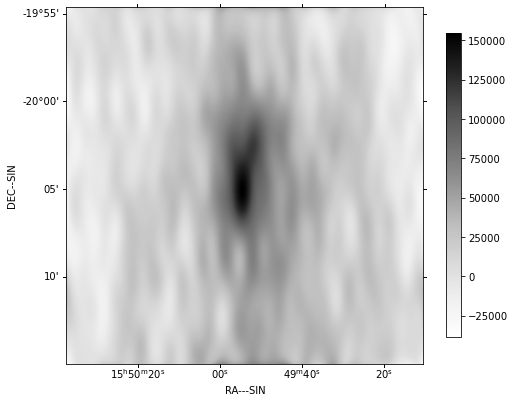

In [63]:
model = create_image_from_visibility(vt, cellsize=cellsize, npixel=512, polarisation_frame=PolarisationFrame('circularnp'))
dirty, sumwt = invert_2d(vt, model, context='2d')
psf, sumwt = invert_2d(vt, model, context='2d', dopsf=True)

show_image(dirty)
print("Max, min in dirty image = %.6f, %.6f, sumwt = %f" % (dirty.data.max(), dirty.data.min(), sumwt))

print("Max, min in PSF         = %.6f, %.6f, sumwt = %f" % (psf.data.max(), psf.data.min(), sumwt))

export_image_to_fits(dirty, '%s/imaging_dirty.fits'%(results_dir))
export_image_to_fits(psf, '%s/imaging_psf.fits'%(results_dir))

Deconvolve using clean

In [ ]:
comp, residual = deconvolve_cube(dirty, psf, niter=10000, threshold=0.001, fractional_threshold=0.001,
                                 window_shape='quarter', gain=0.7, scales=[0, 3, 10, 30])

restored = restore_cube(comp, psf, residual)

# Show the results

fig=show_image(comp)
plt.title('Solution')
fig=show_image(residual)
plt.title('Residual')
fig=show_image(restored)
plt.title('Restored')

deconvolve_cube : window is inner quarter
deconvolve_cube : window is inner quarter
deconvolve_cube : window is inner quarter
deconvolve_cube : window is inner quarter
deconvolve_cube : window is inner quarter
deconvolve_cube : window is inner quarter
deconvolve_cube : window is inner quarter
deconvolve_cube : window is inner quarter
deconvolve_cube : window is inner quarter
deconvolve_cube : window is inner quarter
deconvolve_cube : window is inner quarter
deconvolve_cube : Cleaning inner quarter of each sky plane
deconvolve_cube : Cleaning inner quarter of each sky plane
deconvolve_cube : Cleaning inner quarter of each sky plane
deconvolve_cube : Cleaning inner quarter of each sky plane
deconvolve_cube : Cleaning inner quarter of each sky plane
deconvolve_cube : Cleaning inner quarter of each sky plane
deconvolve_cube : Cleaning inner quarter of each sky plane
deconvolve_cube : Cleaning inner quarter of each sky plane
deconvolve_cube : Cleaning inner quarter of each sky plane
deconvo

msclean : This minor cycle will stop at 10000 iterations or peak < 154.667700 (Jy/beam)
msclean : This minor cycle will stop at 10000 iterations or peak < 154.667700 (Jy/beam)
msclean : This minor cycle will stop at 10000 iterations or peak < 154.667700 (Jy/beam)
msclean : This minor cycle will stop at 10000 iterations or peak < 154.667700 (Jy/beam)
msclean : This minor cycle will stop at 10000 iterations or peak < 154.667700 (Jy/beam)
msclean : This minor cycle will stop at 10000 iterations or peak < 154.667700 (Jy/beam)
msclean : This minor cycle will stop at 10000 iterations or peak < 154.667700 (Jy/beam)
msclean : This minor cycle will stop at 10000 iterations or peak < 154.667700 (Jy/beam)
msclean : This minor cycle will stop at 10000 iterations or peak < 154.667700 (Jy/beam)
msclean : Timing for setup: 0.498 (s) for dirty shape (512, 512), PSF shape (512, 512) , scales [0, 3, 10, 30]
msclean : Timing for setup: 0.498 (s) for dirty shape (512, 512), PSF shape (512, 512) , scales [

msclean : Minor cycle 5000, peak [-1.00480596e+41 -1.00734241e+41 -1.01786395e+41 -7.64389095e+40] at [383, 359, 1]
msclean : Minor cycle 5000, peak [-1.00480596e+41 -1.00734241e+41 -1.01786395e+41 -7.64389095e+40] at [383, 359, 1]
msclean : Minor cycle 5000, peak [-1.00480596e+41 -1.00734241e+41 -1.01786395e+41 -7.64389095e+40] at [383, 359, 1]
msclean : Minor cycle 5000, peak [-1.00480596e+41 -1.00734241e+41 -1.01786395e+41 -7.64389095e+40] at [383, 359, 1]
msclean : Minor cycle 5000, peak [-1.00480596e+41 -1.00734241e+41 -1.01786395e+41 -7.64389095e+40] at [383, 359, 1]
msclean : Minor cycle 5000, peak [-1.00480596e+41 -1.00734241e+41 -1.01786395e+41 -7.64389095e+40] at [383, 359, 1]
msclean : Minor cycle 5000, peak [-1.00480596e+41 -1.00734241e+41 -1.01786395e+41 -7.64389095e+40] at [383, 359, 1]
msclean : Minor cycle 5000, peak [-1.00480596e+41 -1.00734241e+41 -1.01786395e+41 -7.64389095e+40] at [383, 359, 1]
msclean : Minor cycle 5000, peak [-1.00480596e+41 -1.00734241e+41 -1.017

deconvolve_cube : Skipping pol 1, channel 0
deconvolve_cube : Skipping pol 1, channel 0
deconvolve_cube : Skipping pol 1, channel 0
deconvolve_cube : Skipping pol 1, channel 0
deconvolve_cube : Skipping pol 1, channel 0
deconvolve_cube : Skipping pol 1, channel 0
deconvolve_cube : Skipping pol 1, channel 0
deconvolve_cube : Skipping pol 1, channel 0
deconvolve_cube : Skipping pol 1, channel 0
deconvolve_cube : Skipping pol 1, channel 0
deconvolve_cube : Skipping pol 1, channel 0
deconvolve_cube : Processing pol 0, channel 1
deconvolve_cube : Processing pol 0, channel 1
deconvolve_cube : Processing pol 0, channel 1
deconvolve_cube : Processing pol 0, channel 1
deconvolve_cube : Processing pol 0, channel 1
deconvolve_cube : Processing pol 0, channel 1
deconvolve_cube : Processing pol 0, channel 1
deconvolve_cube : Processing pol 0, channel 1
deconvolve_cube : Processing pol 0, channel 1
deconvolve_cube : Processing pol 0, channel 1
deconvolve_cube : Processing pol 0, channel 1
msclean : 

msclean : Minor cycle 0, peak [158507.38153253 158441.66058679 157461.43398798 150200.78894141] at [251, 254, 3]
msclean : Minor cycle 0, peak [158507.38153253 158441.66058679 157461.43398798 150200.78894141] at [251, 254, 3]
msclean : Minor cycle 0, peak [158507.38153253 158441.66058679 157461.43398798 150200.78894141] at [251, 254, 3]
msclean : Minor cycle 0, peak [158507.38153253 158441.66058679 157461.43398798 150200.78894141] at [251, 254, 3]
msclean : Minor cycle 0, peak [158507.38153253 158441.66058679 157461.43398798 150200.78894141] at [251, 254, 3]
msclean : Minor cycle 0, peak [158507.38153253 158441.66058679 157461.43398798 150200.78894141] at [251, 254, 3]
msclean : Minor cycle 1000, peak [4.83363181e+10 4.84904555e+10 4.89243786e+10 3.01413149e+10] at [383, 256, 1]
msclean : Minor cycle 1000, peak [4.83363181e+10 4.84904555e+10 4.89243786e+10 3.01413149e+10] at [383, 256, 1]
msclean : Minor cycle 1000, peak [4.83363181e+10 4.84904555e+10 4.89243786e+10 3.01413149e+10] at 

msclean : Minor cycle 7000, peak [2.38169734e+56 2.38758197e+56 2.40816970e+56 1.75357414e+56] at [383, 325, 1]
msclean : Minor cycle 7000, peak [2.38169734e+56 2.38758197e+56 2.40816970e+56 1.75357414e+56] at [383, 325, 1]
msclean : Minor cycle 7000, peak [2.38169734e+56 2.38758197e+56 2.40816970e+56 1.75357414e+56] at [383, 325, 1]
msclean : Minor cycle 7000, peak [2.38169734e+56 2.38758197e+56 2.40816970e+56 1.75357414e+56] at [383, 325, 1]
msclean : Minor cycle 7000, peak [2.38169734e+56 2.38758197e+56 2.40816970e+56 1.75357414e+56] at [383, 325, 1]
msclean : Minor cycle 7000, peak [2.38169734e+56 2.38758197e+56 2.40816970e+56 1.75357414e+56] at [383, 325, 1]
msclean : Minor cycle 7000, peak [2.38169734e+56 2.38758197e+56 2.40816970e+56 1.75357414e+56] at [383, 325, 1]
msclean : Minor cycle 7000, peak [2.38169734e+56 2.38758197e+56 2.40816970e+56 1.75357414e+56] at [383, 325, 1]
msclean : Minor cycle 7000, peak [2.38169734e+56 2.38758197e+56 2.40816970e+56 1.75357414e+56] at [383, 

msclean : Coupling matrix =
 [[1.         0.99960962 0.99377131 0.94940391]
 [0.99960962 0.99921998 0.99339259 0.94910186]
 [0.99377131 0.99339259 0.9877272  0.94457566]
 [0.94940391 0.94910186 0.94457566 0.90955275]]
msclean : Coupling matrix =
 [[1.         0.99960962 0.99377131 0.94940391]
 [0.99960962 0.99921998 0.99339259 0.94910186]
 [0.99377131 0.99339259 0.9877272  0.94457566]
 [0.94940391 0.94910186 0.94457566 0.90955275]]
msclean : Coupling matrix =
 [[1.         0.99960962 0.99377131 0.94940391]
 [0.99960962 0.99921998 0.99339259 0.94910186]
 [0.99377131 0.99339259 0.9877272  0.94457566]
 [0.94940391 0.94910186 0.94457566 0.90955275]]
msclean : Coupling matrix =
 [[1.         0.99960962 0.99377131 0.94940391]
 [0.99960962 0.99921998 0.99339259 0.94910186]
 [0.99377131 0.99339259 0.9877272  0.94457566]
 [0.94940391 0.94910186 0.94457566 0.90955275]]
msclean : Coupling matrix =
 [[1.         0.99960962 0.99377131 0.94940391]
 [0.99960962 0.99921998 0.99339259 0.94910186]
 [0.9

msclean : Minor cycle 2000, peak [-6.55371813e+17 -6.57160195e+17 -6.59969491e+17 -4.19978183e+17] at [129, 263, 1]
msclean : Minor cycle 2000, peak [-6.55371813e+17 -6.57160195e+17 -6.59969491e+17 -4.19978183e+17] at [129, 263, 1]
msclean : Minor cycle 2000, peak [-6.55371813e+17 -6.57160195e+17 -6.59969491e+17 -4.19978183e+17] at [129, 263, 1]
msclean : Minor cycle 2000, peak [-6.55371813e+17 -6.57160195e+17 -6.59969491e+17 -4.19978183e+17] at [129, 263, 1]
msclean : Minor cycle 2000, peak [-6.55371813e+17 -6.57160195e+17 -6.59969491e+17 -4.19978183e+17] at [129, 263, 1]
msclean : Minor cycle 3000, peak [8.30348168e+25 8.29875043e+25 8.22768718e+25 7.66015446e+25] at [146, 198, 3]
msclean : Minor cycle 3000, peak [8.30348168e+25 8.29875043e+25 8.22768718e+25 7.66015446e+25] at [146, 198, 3]
msclean : Minor cycle 3000, peak [8.30348168e+25 8.29875043e+25 8.22768718e+25 7.66015446e+25] at [146, 198, 3]
msclean : Minor cycle 3000, peak [8.30348168e+25 8.29875043e+25 8.22768718e+25 7.660

msclean : Minor cycle 9000, peak [-4.18505180e+73 -4.18170133e+73 -4.13138219e+73 -3.72776061e+73] at [369, 227, 0]
msclean : Minor cycle 9000, peak [-4.18505180e+73 -4.18170133e+73 -4.13138219e+73 -3.72776061e+73] at [369, 227, 0]
msclean : Minor cycle 9000, peak [-4.18505180e+73 -4.18170133e+73 -4.13138219e+73 -3.72776061e+73] at [369, 227, 0]
msclean : Minor cycle 9000, peak [-4.18505180e+73 -4.18170133e+73 -4.13138219e+73 -3.72776061e+73] at [369, 227, 0]
msclean : Minor cycle 9000, peak [-4.18505180e+73 -4.18170133e+73 -4.13138219e+73 -3.72776061e+73] at [369, 227, 0]
msclean : Minor cycle 9000, peak [-4.18505180e+73 -4.18170133e+73 -4.13138219e+73 -3.72776061e+73] at [369, 227, 0]
msclean : Minor cycle 9000, peak [-4.18505180e+73 -4.18170133e+73 -4.13138219e+73 -3.72776061e+73] at [369, 227, 0]
msclean : Minor cycle 9000, peak [-4.18505180e+73 -4.18170133e+73 -4.13138219e+73 -3.72776061e+73] at [369, 227, 0]
msclean : Minor cycle 9000, peak [-4.18505180e+73 -4.18170133e+73 -4.131

msclean : Start of minor cycle
msclean : Start of minor cycle
msclean : Start of minor cycle
msclean : Start of minor cycle
msclean : Start of minor cycle
msclean : Start of minor cycle
msclean : Start of minor cycle
msclean : Start of minor cycle
msclean : Start of minor cycle
msclean : Start of minor cycle
msclean : Start of minor cycle
msclean : This minor cycle will stop at 10000 iterations or peak < 6.823186 (Jy/beam)
msclean : This minor cycle will stop at 10000 iterations or peak < 6.823186 (Jy/beam)
msclean : This minor cycle will stop at 10000 iterations or peak < 6.823186 (Jy/beam)
msclean : This minor cycle will stop at 10000 iterations or peak < 6.823186 (Jy/beam)
msclean : This minor cycle will stop at 10000 iterations or peak < 6.823186 (Jy/beam)
msclean : This minor cycle will stop at 10000 iterations or peak < 6.823186 (Jy/beam)
msclean : This minor cycle will stop at 10000 iterations or peak < 6.823186 (Jy/beam)
msclean : This minor cycle will stop at 10000 iterations 

msclean : Minor cycle 4000, peak [1.96787213e+33 1.97381065e+33 1.98635709e+33 1.25378317e+33] at [383, 286, 1]
msclean : Minor cycle 4000, peak [1.96787213e+33 1.97381065e+33 1.98635709e+33 1.25378317e+33] at [383, 286, 1]
msclean : Minor cycle 4000, peak [1.96787213e+33 1.97381065e+33 1.98635709e+33 1.25378317e+33] at [383, 286, 1]
msclean : Minor cycle 5000, peak [-1.89782558e+41 -1.90214886e+41 -1.90313813e+41 -1.24255693e+41] at [129, 227, 1]
msclean : Minor cycle 5000, peak [-1.89782558e+41 -1.90214886e+41 -1.90313813e+41 -1.24255693e+41] at [129, 227, 1]
msclean : Minor cycle 5000, peak [-1.89782558e+41 -1.90214886e+41 -1.90313813e+41 -1.24255693e+41] at [129, 227, 1]
msclean : Minor cycle 5000, peak [-1.89782558e+41 -1.90214886e+41 -1.90313813e+41 -1.24255693e+41] at [129, 227, 1]
msclean : Minor cycle 5000, peak [-1.89782558e+41 -1.90214886e+41 -1.90313813e+41 -1.24255693e+41] at [129, 227, 1]
msclean : Minor cycle 5000, peak [-1.89782558e+41 -1.90214886e+41 -1.90313813e+41 -1

Predict the visibility of the model

Now we will plot the original visibility and the residual visibility.

In [64]:
uvdist=numpy.sqrt(vt.data['uvw'][:,0]**2+vt.data['uvw'][:,1]**2)
plt.clf()
plt.plot(uvdist, numpy.abs(vt.data['vis'][:]-vtmodel.data['vis'][:]), '.', color='r', 
         label='Residual')
plt.plot(uvdist, numpy.abs(vt.data['vis'][:]), '.', color='b', label='Original')

plt.xlabel('uvdist')
plt.ylabel('Amp Visibility')
plt.legend()
plt.show()

NameError: name 'vtmodel' is not defined

<Figure size 576x576 with 0 Axes>